<a href="https://colab.research.google.com/github/khoirulwhyd/UAS_PCVK_2022/blob/main/tubes_carpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUBES PCVK**
NAMA ANGGOTA
1. MUHAMMAD KHOIRUL WAHYUDIN ( TI3E, 1941721060 )
2. HAMDAAN DAALAL FAUZI ( TI3E, 1941720148 )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
from google.colab.patches import cv2_imshow

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/images/Car Park/2012-10-26_07_49_29.jpg')

In [18]:
img_car = '/content/drive/MyDrive/images/Car Park/2012-11-09_06_56_32.jpg';
img = cv2.imread(img_car)
img2 = cv2.imread(img_car)
image_path = '/content/drive/MyDrive/images/Car Park'
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
car_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/images/haarcascades/cars.xml')
cars = car_cascade.detectMultiScale(gray, 1.3, 5)

In [19]:
def pic_multi(imgA,imgB):
  fig = plt.figure(figsize=(15, 15))
  rows = 2
  columns = 2
  fig.add_subplot(rows, columns, 1)
  plt.axis('off')
  plt.title("Original Image")
  plt.imshow(imgA[:,:,::-1])
  fig.add_subplot(rows, columns, 2)
  plt.axis('off')
  plt.title("Tested Image")
  plt.imshow(imgB[:,:,::-1])

0  Sedikit


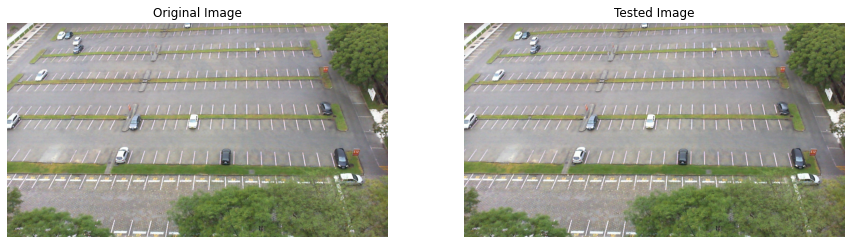

In [20]:
jumlah =0;
for(x,y,w,h) in cars: 
  jumlah+=1;
  detected_car = img2[int(y):int(y+h), int(x):int(x+w)]
  cv2.imwrite("/content/drive/MyDrive/images/Car Park/car"+str(jumlah)+".jpg",detected_car)
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

pic_multi(img2,img)

if jumlah<30:
  print(jumlah," Sedikit")
elif jumlah>=30 and jumlah<80:
  print(jumlah," Sedang")
else:
  print(jumlah," Banyak")

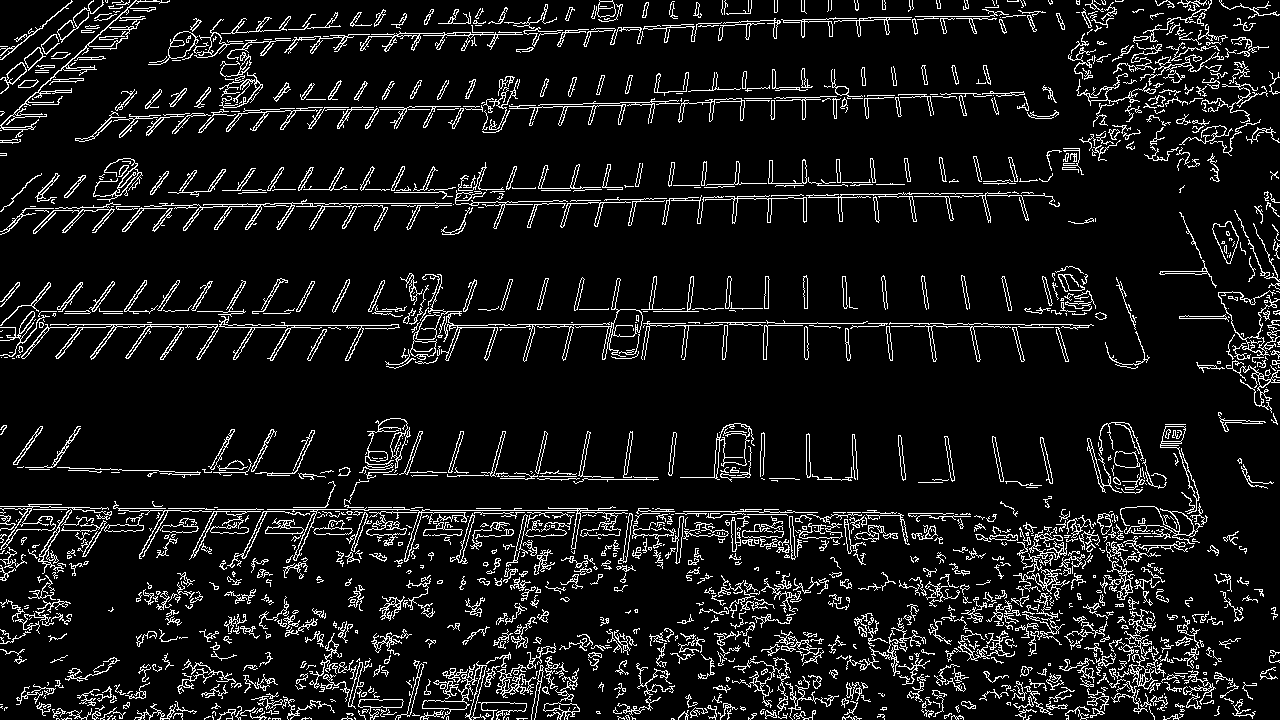

In [21]:
edges = cv2.Canny(gray, 50, 150, 3)
cv2_imshow(edges)

Number of white pixels: 237
Number of black pixels: 6012
Crowded Level : 
Less Crowded
Accurate percentage :  3.7926068170907343 %


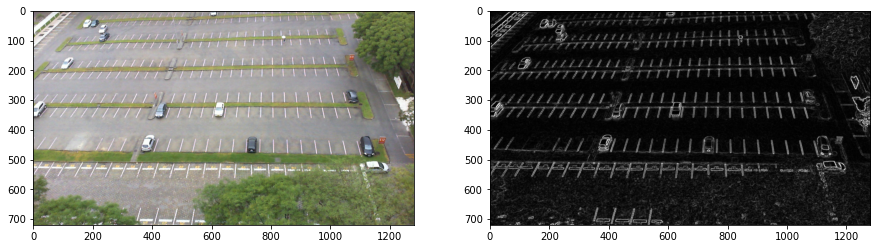

In [22]:
#image Path
img0 = cv.imread('/content/drive/MyDrive/images/Car Park/2012-11-09_06_56_32.jpg')

#convert to grayscale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

#removing noises
img = cv.GaussianBlur(gray,(3,3),0)

#sobel edge detection
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

#calculate white and black pixel
number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

#Create Category by Data Range
print("Crowded Level : ")
if (number_of_white_pix > 3000):
    print("So Crowded")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
    print("Crowded")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
    print("Less Crowded")
elif (number_of_white_pix < 100):
    print("Least")

threshold = (number_of_white_pix/(number_of_white_pix + number_of_black_pix)) * 100

print("Accurate percentage : ", threshold, "%")